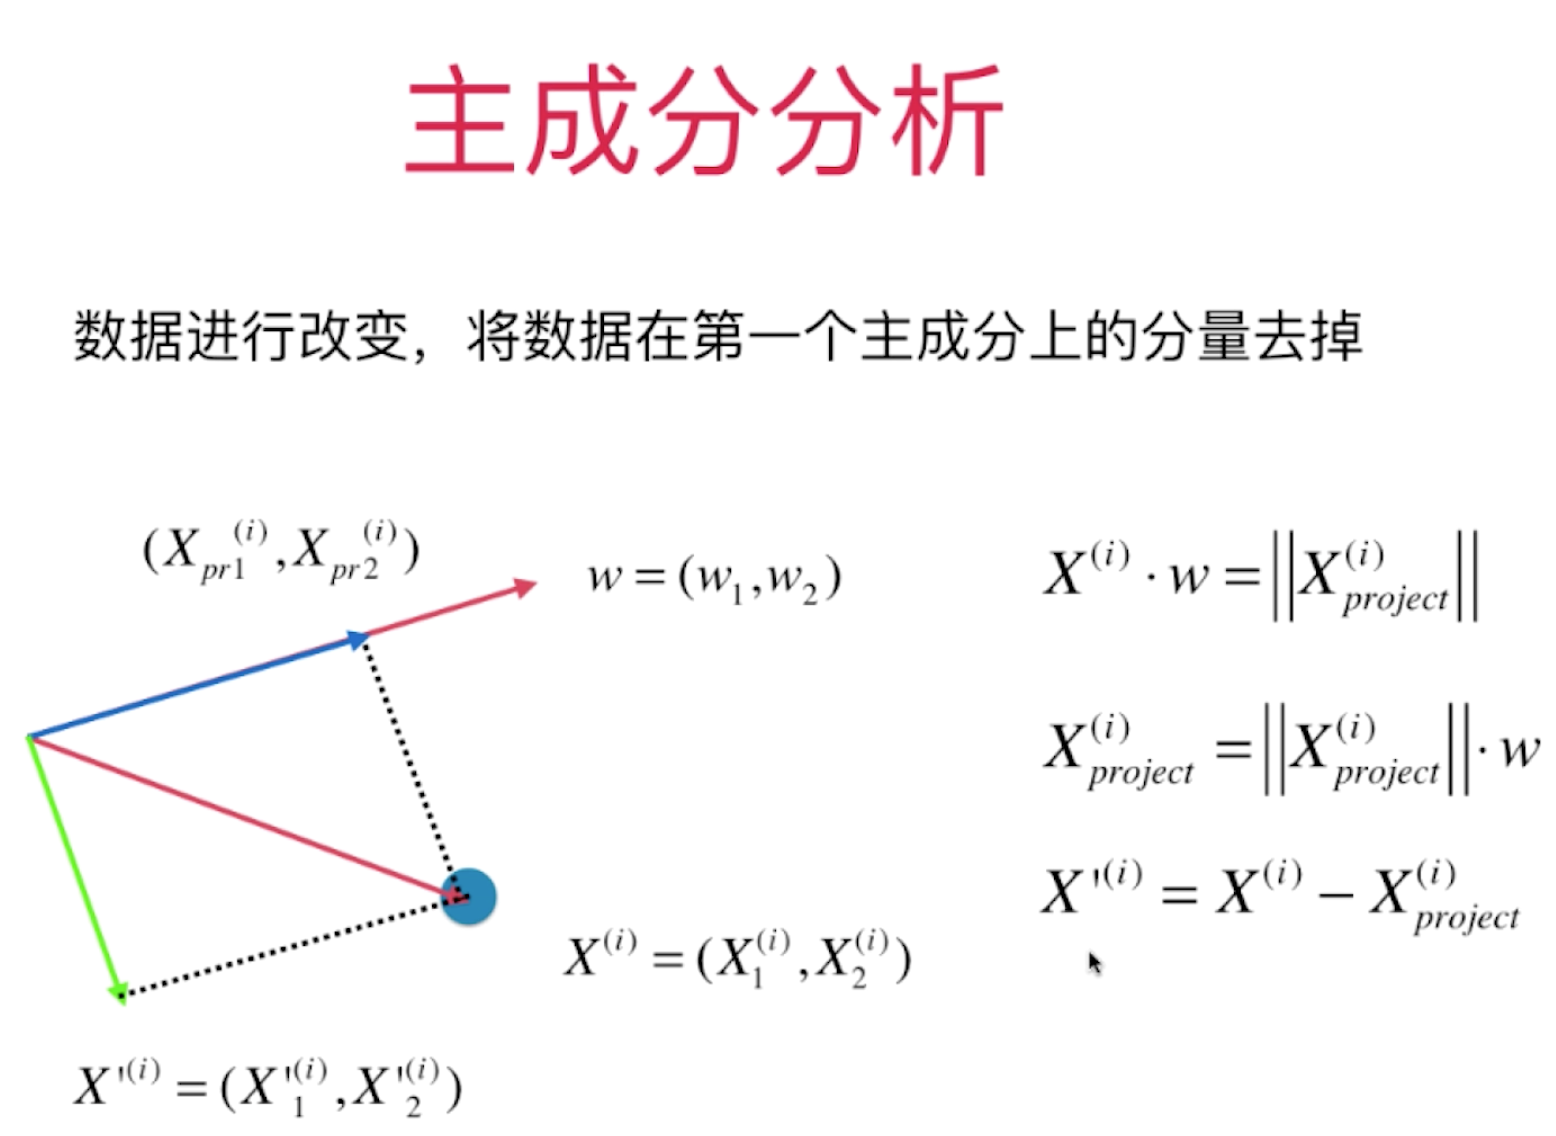

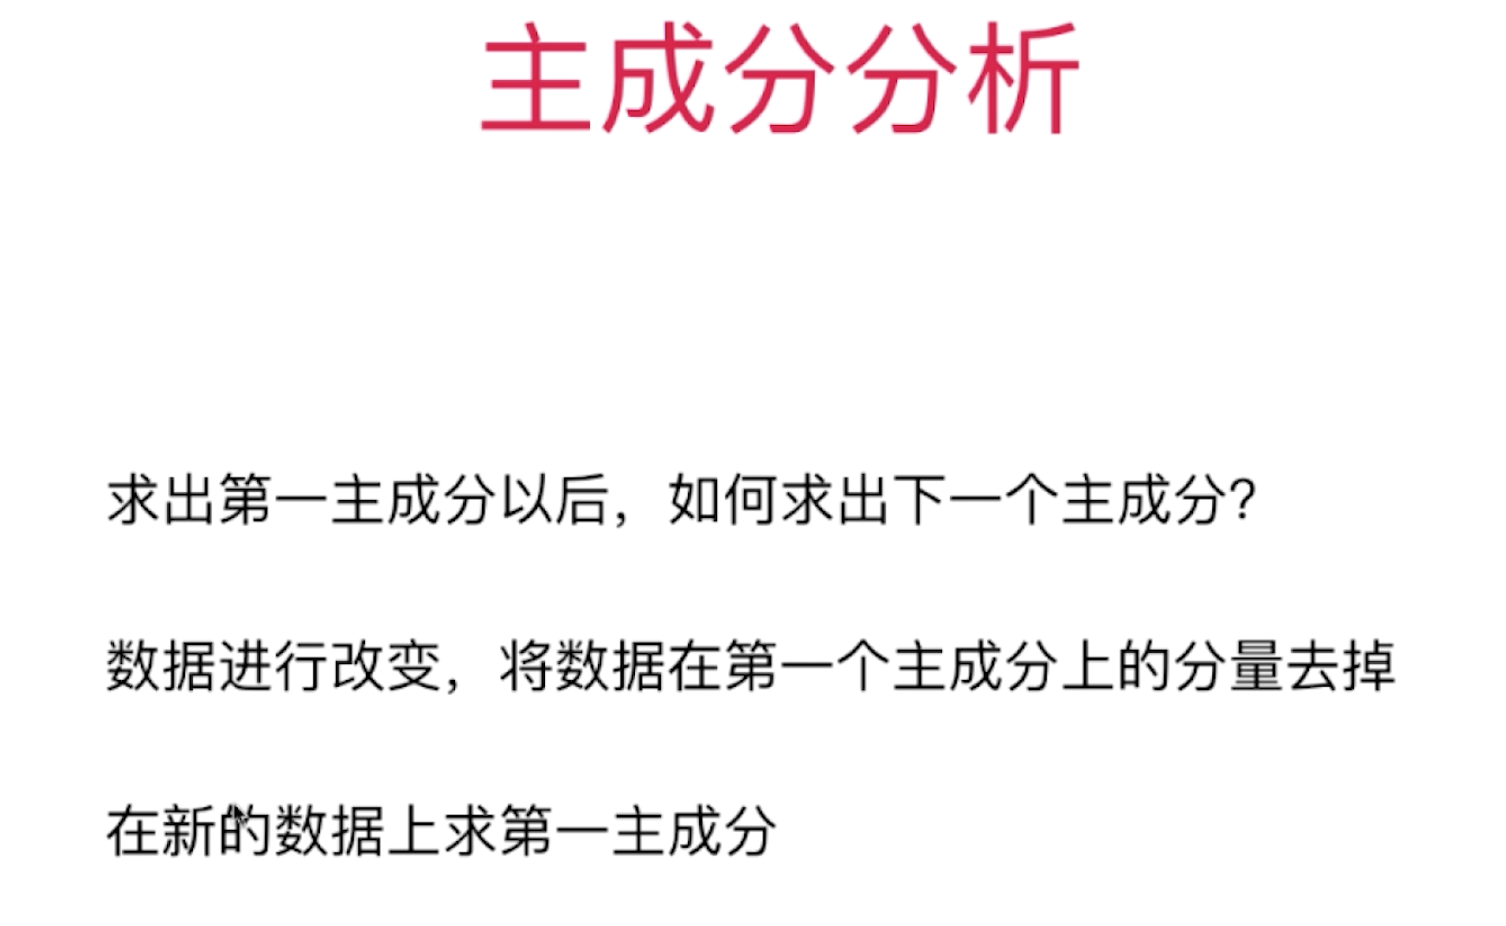

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))   # 里面的数字应该是内存的原本内容
X[:,0] = np.random.uniform(0., 100., size=100)   # 0 - 100 的实数
X[:,1]  = 0.75 * X[:,0] + 3. + np.random.normal(0, 10. , size=100)

In [3]:
def demean(X):
    return X - np.mean(X, axis = 0)  # 按照行增加的方向求均值（列均值）

X = demean(X)

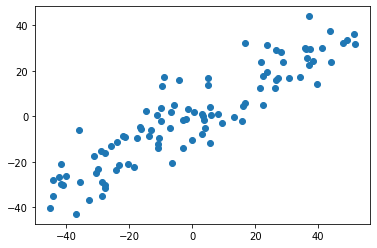

In [4]:
plt.scatter(X[: ,0], X[: ,1])
plt.show()

In [6]:
def f(w, X):
    """方差函数"""
    return np.sum(X.dot(w) ** 2) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    """转换为方向向量"""
    return w / np.linalg.norm(w) #linalg也有求逆的运算, 这里的norm是求模

def first_component(X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)  # 注意1：转换为方向向量
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1
    
    return w

In [7]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.79566318, 0.6057393 ])

In [22]:
# X2 = np.empty(X.shape)
# for i in range(len(X)):
#     X2[i] = X[i] - X[i].dot(w) * w
    
X2 = X - X.dot(w).reshape(-1, 1) * w    # w 是第一主成分的方向向量，
                                                      # X2 是减去第一主成分之后的 X 剩下的向量坐标

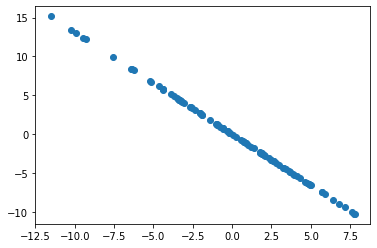

In [23]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [24]:
w2 = first_component(X2, initial_w, eta)
w2

array([-0.60573269,  0.79566821])

In [25]:
w.dot(w2)   #接近于0，说明垂直

8.305626982618719e-06

In [26]:
print(X2.shape)
print(X.shape)    #说明只是改变了坐标系

(100, 2)
(100, 2)


### 封装

In [31]:
def first_n_components(n, X, eta=0.01, n_iters=1e4, epsilon=1e-8):
    
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1,1) * w
    return res

In [32]:
first_n_components(2, X)

[array([0.79566323, 0.60573924]), array([-0.60573356,  0.79566755])]